### Content of database
- ID: Represents a unique identification of an entry 
- Customer_ID: Represents a unique identification of a person 
- Month: Represents the month of the year
- Name: Represents the name of a person 
- Age: Represents the age of the person
- SSN: Represents the social security number of a person 
- Occupation: Represents the occupation of the person
- Annual_Income: Represents the annual income of the person
- Monthly_Base_Salary: Represents the monthly base salary of a person
- Num_Bank_Accounts: Represents the number of bank accounts a person holds
- Num_Credit_Card: Represents the number of other credit cards held by a person
- Interest_Rate: Represents the interest rate on credit card
- Num_of_Loan: Represents the number of loans taken from the bank
- Type_of_Loan: Represents the types of loan taken by a person
- Delay_from_due_date: Represents the average number of days delayed from the payment date
- Num_of_delayed_Payment: Represents the average number of payments delayed by a person
- Changed_Credit_Limit: Represents the percentage change in credit card limit
- Num_Credit_Inquiries: Represents the number of credit card inquiries
- Credit_Mix: Represents the classification of the mix of credits
- Outstanding_Debt: Represents the remaining debt to be paid (in USD)
- Credit_Utilization_Ratio: Represents the utilization ratio of credit card
- Credit_History_Age: Represents the age of credit history of the person
- Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person
- Total_EMI_per_month: Represents the monthly EMI payments (in USD)
- Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)
- Payment_Behaviour: Represents the payment behavior of the customer (in USD)
- Monthly_Balance: Represents the monthly balance amount of the customer (in USD)
- Credit_Score: Represents the bracket of credit score (Poor, Standard, Good)

# Import Library

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Overview of Dataset

In [247]:
data = pd.read_csv("train.csv",low_memory=False)
print(data.shape)
data.head(10)

(100000, 28)


ID Customer_ID     Month             Name   Age          SSN  \
0  0x1602   CUS_0xd40   January    Aaron Maashoh    23  821-00-0265   
1  0x1603   CUS_0xd40  February    Aaron Maashoh    23  821-00-0265   
2  0x1604   CUS_0xd40     March    Aaron Maashoh  -500  821-00-0265   
3  0x1605   CUS_0xd40     April    Aaron Maashoh    23  821-00-0265   
4  0x1606   CUS_0xd40       May    Aaron Maashoh    23  821-00-0265   
5  0x1607   CUS_0xd40      June    Aaron Maashoh    23  821-00-0265   
6  0x1608   CUS_0xd40      July    Aaron Maashoh    23  821-00-0265   
7  0x1609   CUS_0xd40    August              NaN    23    #F%$D@*&8   
8  0x160e  CUS_0x21b1   January  Rick Rothackerj   28_  004-07-5839   
9  0x160f  CUS_0x21b1  February  Rick Rothackerj    28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0  Scientist      19114.12            1824.843333                  3  ...   
1  Scientist      19114.12                    NaN                  3  ...   
2  Scientist      19114.12                    NaN                  3  ...   
3  Scientist      19114.12                    NaN                  3  ...   
4  Scientist      19114.12            1824.843333                  3  ...   
5  Scientist      19114.12                    NaN                  3  ...   
6  Scientist      19114.12            1824.843333                  3  ...   
7  Scientist      19114.12            1824.843333                  3  ...   
8    _______      34847.84            3037.986667                  2  ...   
9    Teacher      34847.84            3037.986667                  2  ...   

   Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0           _            809.98                26.822620   
1        Good            809.98                31.944960   
2        Good            809.98                28.609352   
3        Good            809.98                31.377862   
4        Good            809.98                24.797347   
5        Good            809.98                27.262259   
6        Good            809.98                22.537593   
7        Good            809.98                23.933795   
8        Good            605.03                24.464031   
9        Good            605.03                38.550848   

      Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0  22 Years and 1 Months                     No           49.574949   
1                    NaN                     No           49.574949   
2  22 Years and 3 Months                     No           49.574949   
3  22 Years and 4 Months                     No           49.574949   
4  22 Years and 5 Months                     No           49.574949   
5  22 Years and 6 Months                     No           49.574949   
6  22 Years and 7 Months                     No           49.574949   
7                    NaN                     No           49.574949   
8  26 Years and 7 Months                     No           18.816215   
9  26 Years and 8 Months                     No           18.816215   

  Amount_invested_monthly                 Payment_Behaviour  \
0       80.41529543900253   High_spent_Small_value_payments   
1      118.28022162236736    Low_spent_Large_value_payments   
2         81.699521264648   Low_spent_Medium_value_payments   
3       199.4580743910713    Low_spent_Small_value_payments   
4      41.420153086217326  High_spent_Medium_value_payments   
5      62.430172331195294                            !@9#%8   
6       178.3440674122349    Low_spent_Small_value_payments   
7      24.785216509052056  High_spent_Medium_value_payments   
8        104.291825168246    Low_spent_Small_value_payments   
9       40.39123782853101   High_spent_Large_value_payments   

      Monthly_Balance Credit_Score  
0  312.49408867943663         Good  
1  284.62916249607184         Good  
2   331.2098628537912         Good  
3  223.45130972736786         Good  
4  341.48923103222177         Good  
5   340.4792117872

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [249]:
data.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

In [250]:
data.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [251]:
data.duplicated().sum()

0

# Data Preprocessing

In [252]:
df = data.copy()

In [253]:
# Drop uneeded columns
df.drop(columns=['SSN', 'Name','ID','Customer_ID','Month','Type_of_Loan'], axis=1, inplace=True)

In [254]:
# Separate the data into two parts
num_col = df.select_dtypes(exclude='object')
categ_col = df.select_dtypes(include='object')

## Handling Categorical Data

In [255]:
# Convert category type to nan and float
for col in categ_col:
    categ_col[col] = categ_col[col].str.strip('_')

    try:
        categ_col[col] = categ_col[col].astype('float64')
    except:
        categ_col[col] = categ_col[col]
        

for col in categ_col:
    categ_col[col] = categ_col[col].replace({'':np.nan})

    try:
        categ_col[col] = categ_col[col].astype('float64')
    except:
        categ_col[col] = categ_col[col]

for col in categ_col:
    categ_col[col] = categ_col[col].replace({'!@9#%8':np.nan, '#F%$D@*&8':np.nan})

In [256]:
def filter_general(value):
    if '-' in str(value):
        return str(value).split('-')[1]
    elif '_' in str(value):
        return str(value).split('_')[0]
    else:
        return str(value)

In [257]:
categ_col.drop(categ_col[categ_col["Monthly_Balance"] == '__-333333333333333333333333333__'].index, inplace=True)
for i in ['Age', 'Annual_Income', 'Num_of_Loan','Changed_Credit_Limit',
          'Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']:
    categ_col[i] = categ_col[i].apply(filter_general)
    categ_col[i] = categ_col[i].astype(np.float64)
    print(i + " Successfully Cleaned")

Age Successfully Cleaned
Annual_Income Successfully Cleaned
Num_of_Loan Successfully Cleaned
Changed_Credit_Limit Successfully Cleaned
Outstanding_Debt Successfully Cleaned
Amount_invested_monthly Successfully Cleaned
Monthly_Balance Successfully Cleaned


In [258]:
def filter_delayed_payments(value):
    if "__" in str(value):
        return str(value).split("__")[1]
    elif '_' in str(value):
        return str(value).replace("_", "")
    elif str(value) == '_':
        return str(value)
    else:
        return str(value)

In [259]:
categ_col['Num_of_Delayed_Payment'] = categ_col['Num_of_Delayed_Payment'].apply(filter_delayed_payments)
categ_col['Num_of_Delayed_Payment'] = categ_col['Num_of_Delayed_Payment'].astype(np.float64)

In [260]:
# Credit_History_Age only use the years only
credit_history = []
for i in categ_col["Credit_History_Age"]:
    credit_history.append(str(i).split(' ')[0])
categ_col["Credit_History_Age"] = credit_history
# Replace the Credit_History_Age
categ_col["Credit_History_Age"] = categ_col["Credit_History_Age"].replace({'NaN:np.nan'})
# Convert the Credit_History_Age column to a float
categ_col["Credit_History_Age"] = categ_col["Credit_History_Age"].astype('float64')

In [261]:
numeric = categ_col.select_dtypes(exclude='object')

In [262]:
categ_col.drop(columns=['Age', 'Annual_Income', 'Num_of_Loan','Changed_Credit_Limit',
                        'Outstanding_Debt','Amount_invested_monthly','Monthly_Balance',
                        'Credit_History_Age','Num_of_Delayed_Payment'], axis=1, inplace=True)

In [263]:
categ_col.isna().sum()

Occupation                7062
Credit_Mix               20195
Payment_of_Min_Amount        0
Payment_Behaviour         7600
Credit_Score                 0
dtype: int64

In [264]:
categ_col['Occupation'].unique()

array(['Scientist', nan, 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [265]:
# Handling missing value occupation
categ_col['Occupation'] = categ_col['Occupation'].replace(np.nan)
categ_col['Occupation'] = categ_col['Occupation'].fillna(np.random.choice(pd.Series(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'])))

In [266]:
categ_col['Credit_Mix'].unique()

array([nan, 'Good', 'Standard', 'Bad'], dtype=object)

In [267]:
categ_col['Credit_Mix'] = categ_col['Credit_Mix'].replace(np.nan)
categ_col['Credit_Mix'] = categ_col['Credit_Mix'].fillna(np.random.choice(pd.Series(['Good','Standard','Bad'])))

In [268]:
categ_col['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', nan,
       'High_spent_Large_value_payments'], dtype=object)

In [269]:
categ_col['Payment_Behaviour'] = categ_col['Payment_Behaviour'].replace(np.nan)
categ_col['Payment_Behaviour'] = categ_col['Payment_Behaviour'].fillna(np.random.choice(pd.Series(['High_spent_Small_value_payments',
                                                                                                   'Low_spent_Large_value_payments',
                                                                                                   'Low_spent_Medium_value_payments',
                                                                                                   'Low_spent_Small_value_payments',
                                                                                                   'High_spent_Medium_value_payments',
                                                                                                   'High_spent_Large_value_payments'])))

## Analysis Categorical Feature

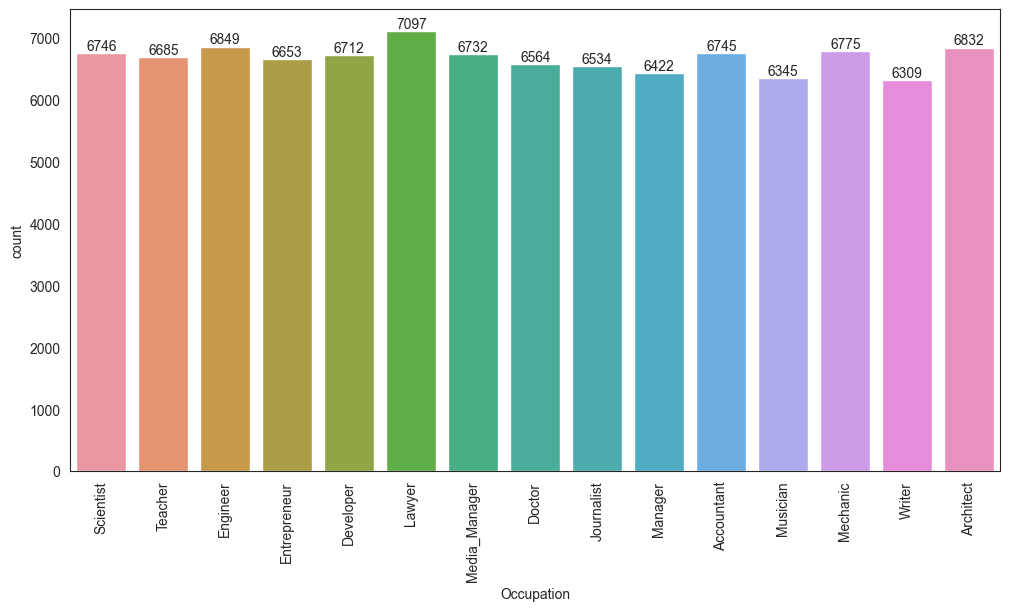

In [270]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='Occupation', data=categ_col)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel("Occupation")
plt.xticks(rotation=90)
plt.show()

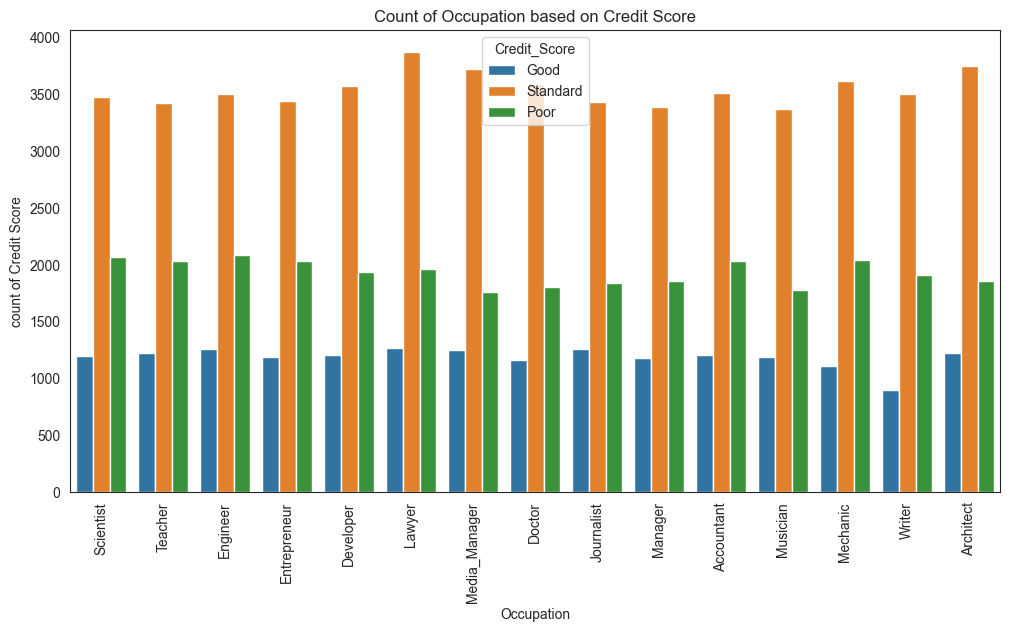

In [271]:
plt.figure(figsize=(12,6))
sns.countplot(x='Occupation', hue='Credit_Score', data=categ_col)
plt.title("Count of Occupation based on Credit Score")
plt.xlabel("Occupation")
plt.ylabel("count of Credit Score")
plt.xticks(rotation=90)
plt.show()

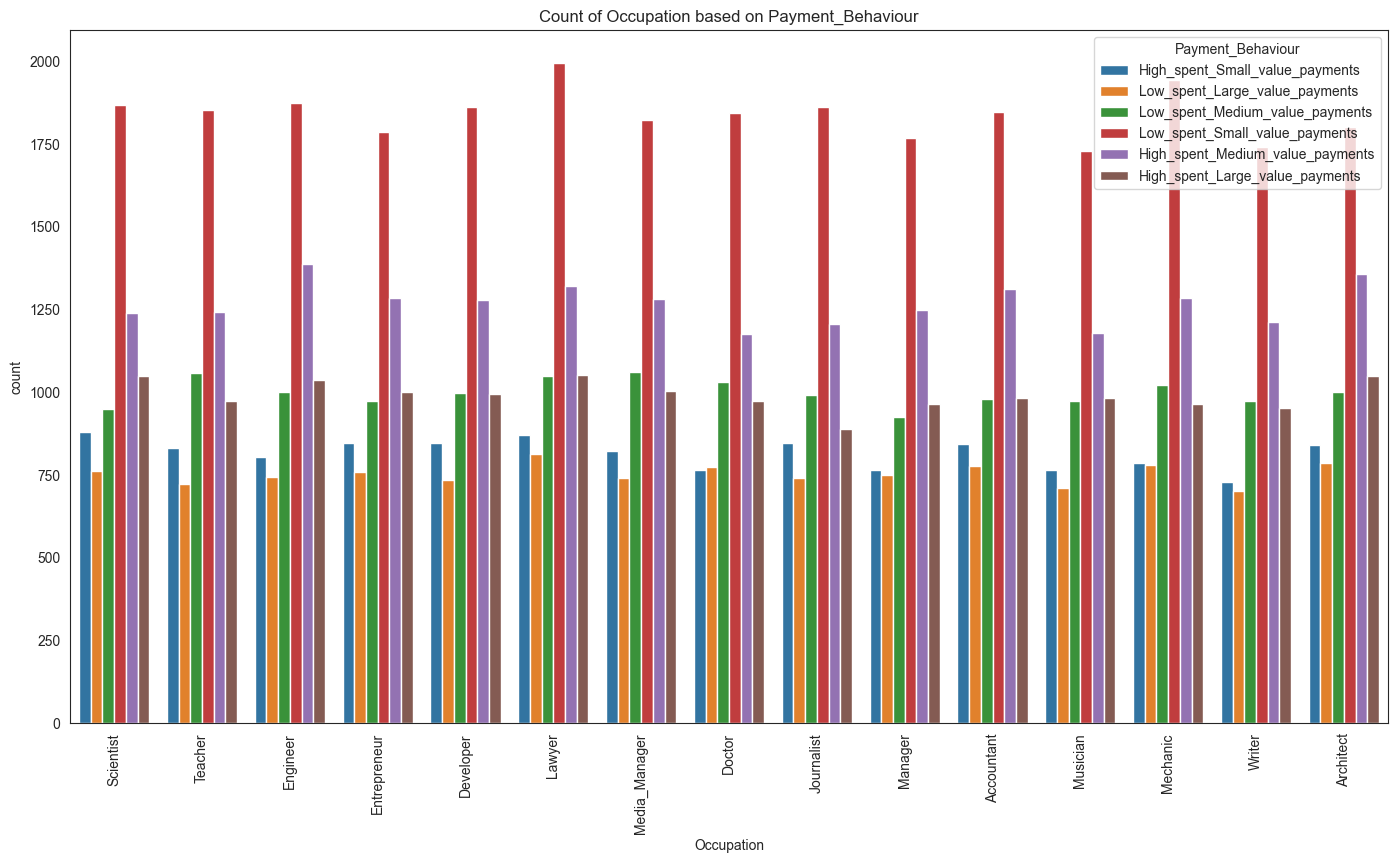

In [272]:
plt.figure(figsize=(17,9))
ax = sns.countplot(x='Occupation', hue='Payment_Behaviour', data=categ_col)
plt.title("Count of Occupation based on Payment_Behaviour")
plt.xlabel("Occupation")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.show()

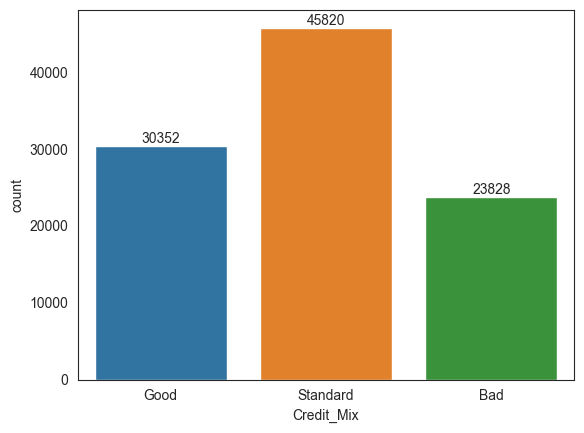

In [273]:
ax = sns.countplot(x='Credit_Mix', data=categ_col)
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

## Categorical Data Encoding & Checking multicollinearity with VIF

In [274]:
# Label encoder for categorical columns
labelencoder = LabelEncoder()
categ_col['Credit_Mix'] = labelencoder.fit_transform(categ_col['Credit_Mix'])
categ_col['Payment_of_Min_Amount'] = labelencoder.fit_transform(categ_col['Payment_of_Min_Amount'])
categ_col['Credit_Score'] = labelencoder.fit_transform(categ_col['Credit_Score'])

# One-Hot encoding for category columns
categ_col = pd.get_dummies(categ_col, columns = ['Occupation','Payment_Behaviour'])

In [275]:
vif_df = categ_col
vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values ,i) for i in range(len(vif_df.columns))]
vif_data.head(10)

C:\Users\AJI\.conda\envs\Portofolio\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


feature       VIF
0               Credit_Mix  1.058208
1    Payment_of_Min_Amount  1.041623
2             Credit_Score  1.090644
3    Occupation_Accountant       inf
4     Occupation_Architect       inf
5     Occupation_Developer       inf
6        Occupation_Doctor       inf
7      Occupation_Engineer       inf
8  Occupation_Entrepreneur       inf
9    Occupation_Journalist       inf

In [276]:
vif = categ_col.drop(categ_col.columns[[10]], axis=1)
vif_df = vif

vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values ,i) for i in range(len(vif_df.columns))]
vif_data.head(10)

feature       VIF
0               Credit_Mix  1.058208
1    Payment_of_Min_Amount  1.041623
2             Credit_Score  1.090657
3    Occupation_Accountant  1.819058
4     Occupation_Architect  1.828712
5     Occupation_Developer  1.815391
6        Occupation_Doctor  1.798844
7      Occupation_Engineer  1.831257
8  Occupation_Entrepreneur  1.808933
9    Occupation_Journalist  1.795410

## Handling Numerical Data

In [277]:
numeric_col = pd.concat([num_col, numeric], axis = 1)

In [278]:
numeric_col.head(10)

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0            1824.843333                  3                4              3   
1                    NaN                  3                4              3   
2                    NaN                  3                4              3   
3                    NaN                  3                4              3   
4            1824.843333                  3                4              3   
5                    NaN                  3                4              3   
6            1824.843333                  3                4              3   
7            1824.843333                  3                4              3   
8            3037.986667                  2                4              6   
9            3037.986667                  2                4              6   

   Delay_from_due_date  Num_Credit_Inquiries  Credit_Utilization_Ratio  \
0                    3                   4.0                 26.822620   
1                   -1                   4.0                 31.944960   
2                    3                   4.0                 28.609352   
3                    5                   4.0                 31.377862   
4                    6                   4.0                 24.797347   
5                    8                   4.0                 27.262259   
6                    3                   4.0                 22.537593   
7                    3                   4.0                 23.933795   
8                    3                   2.0                 24.464031   
9                    7                   2.0                 38.550848   

   Total_EMI_per_month    Age  Annual_Income  Num_of_Loan  \
0            49.574949   23.0       19114.12          4.0   
1            49.574949   23.0       19114.12          4.0   
2            49.574949  500.0       19114.12          4.0   
3            49.574949   23.0       19114.12          4.0   
4            49.574949   23.0       19114.12          4.0   
5            49.574949   23.0       19114.12          4.0   
6            49.574949   23.0       19114.12          4.0   
7            49.574949   23.0       19114.12          4.0   
8            18.816215   28.0       34847.84          1.0   
9            18.816215   28.0       34847.84          1.0   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Outstanding_Debt  \
0                     7.0                 11.27            809.98   
1                     NaN                 11.27            809.98   
2                     7.0                   NaN            809.98   
3                     4.0                  6.27            809.98   
4                     NaN                 11.27            809.98   
5                     4.0                  9.27            809.98   
6                     8.0                 11.27            809.98   
7                     6.0                 11.27            809.98   
8                     4.0                  5.42            605.03   
9                     1.0                  7.42            605.03   

   Credit_History_Age  Amount_invested_monthly  Monthly_Balance  
0                22.0                80.415295       312.494089  
1                 NaN               118.280222       284.629162  
2                22.0                81.699521       331.209863  
3                22.0               199.458074       223.451310  
4                22.0                41.420153       341.489231  
5                22.0                62.430172       340.479212  
6                22.0               178.344067       244.565317  
7                 NaN                24.785217       358.124168  
8                26.0               104.291825       470.690627  
9                26.0                40.391238       484.591214

In [279]:
numeric_col.describe()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000              3.000000   
50%        13.000000            18.000000              6.000000   
75%        20.000000            28.000000              9.000000   
max      5797.000000            67.000000           2597.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month            Age  \
count             100000.000000        100000.000000  100000.000000   
mean                  32.285173          1403.118217     119.509700   
std                    5.116875          8306.041270     684.757313   
min                   20.000000             0.000000      14.000000   
25%                   28.052567            30.306660      25.000000   
50%                   32.305784            69.249473      34.000000   
75%                   36.496663           161.224249      42.000000   
max                   50.000000         82331.000000    8698.000000   

       Annual_Income    Num_of_Loan  Num_of_Delayed_Payment  \
count   1.000000e+05  100000.000000            92998.000000   
mean    1.764157e+05      10.761960               30.923342   
std     1.429618e+06      61.789933              226.031892   
min     7.005930e+03       0.000000               -3.000000   
25%     1.945750e+04       2.000000                9.000000   
50%     3.757861e+04       3.000000               14.000000   
75%     7.279092e+04       6.000000               18.000000   
max     2.419806e+07    1496.000000             4397.000000   

       Changed_Credit_Limit  Outstanding_Debt  Credit_History_Age  \
count          97909.000000     100000.000000        90970.000000   
mean              10.465678       1426.220376           17.966516   
std                6.670732       1155.129026            8.319862   
min                0.000000          0.230000            0.000000   
25%                5.350000        566.072500           12.000000   
50%                9.400000       1166.155000           18.000000   
75%               14.870000       1945.962500           25.000000   
max               36.970000       4998.070000           33.000000   

       Amount_invested_monthly  Monthly_Balance  
count             95521.000000     9.880000e+04  
mean                637.412998     3.036437e+22  
std                2043.319327     3.181295e+24  
min                   0.000000     7.759665e-03  
25%                  74.534002     2.701145e+02  
50%                 135.925682     3.367423e+02  
75%                 265.731733     4.703321e+02  
max               10000.000000     3.333333e+26

In [280]:
# Handling missing values num_col
for col in numeric_col.columns:
  missing_values = numeric_col[col].isnull().sum()
  if missing_values > 0:
    print(f"{col} has {missing_values} missing values")

Monthly_Inhand_Salary has 15002 missing values
Num_Credit_Inquiries has 1965 missing values
Num_of_Delayed_Payment has 7002 missing values
Changed_Credit_Limit has 2091 missing values
Credit_History_Age has 9030 missing values
Amount_invested_monthly has 4479 missing values
Monthly_Balance has 1200 missing values


In [281]:
for col in numeric_col.columns: 
    numeric_col[col].fillna(numeric_col[col].mean(), inplace=True)
print('Fillna success')

Fillna success


## Analysis Numerical Data

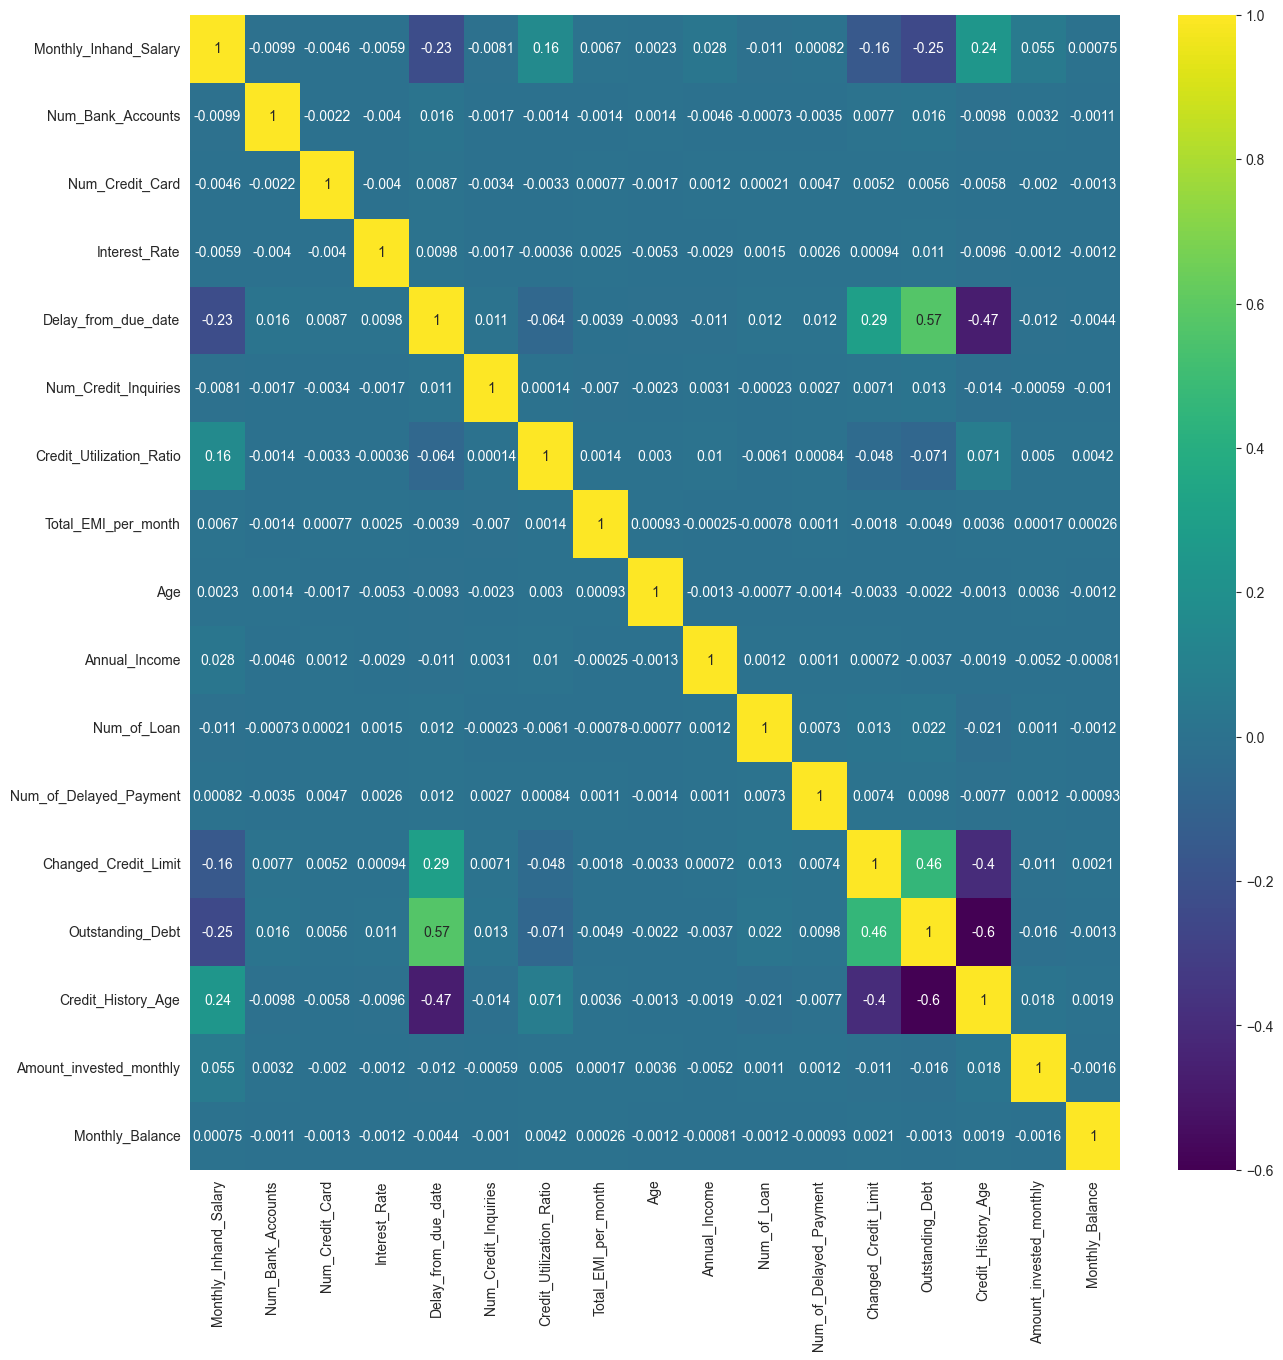

In [282]:
corr = numeric_col.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,cmap='viridis', annot=True)
plt.show()

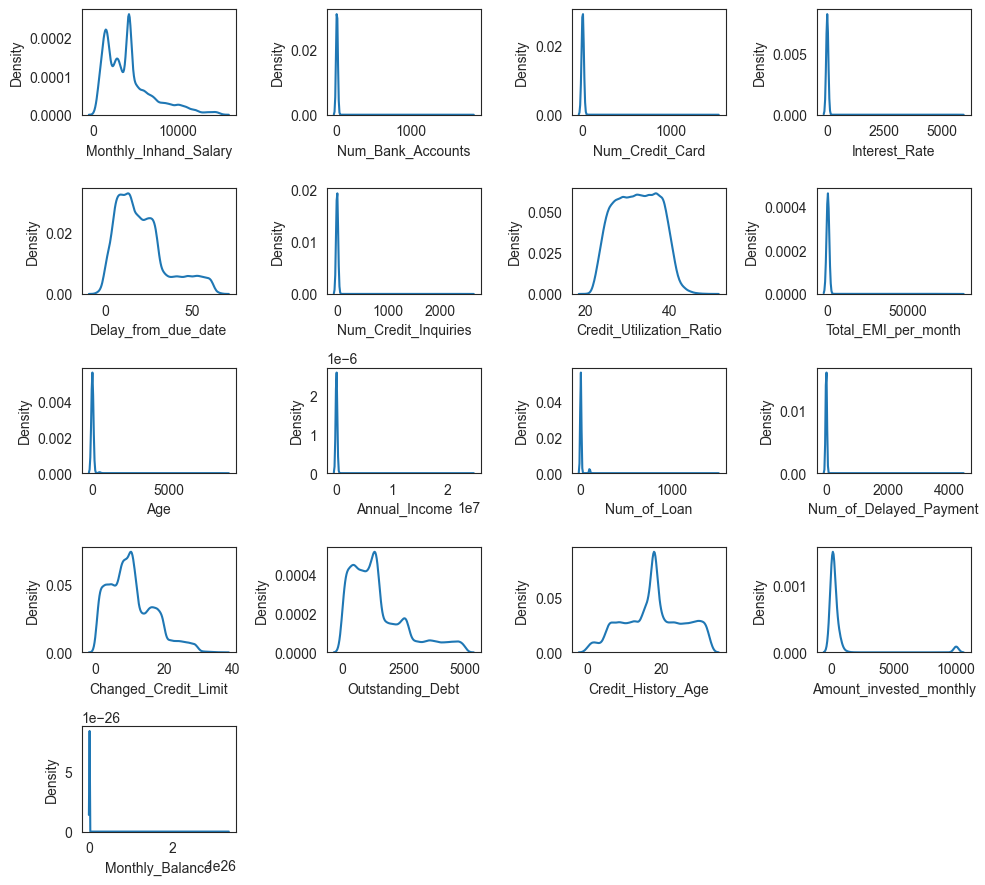

In [283]:
# Numerical data distribution
fig = plt.figure(figsize= (10,9))
for i, col in enumerate(numeric_col):
    ax=fig.add_subplot(5,4,i+1)
    sns.kdeplot(x=numeric_col[col], ax=ax)
    
fig.tight_layout()  
plt.show()

In [284]:
# Handling Age columns
numeric_col.drop(numeric_col[numeric_col["Age"] >= 80].index, inplace=True)
numeric_col['Age'].unique()

array([23., 28., 34., 54., 55., 21., 31., 33., 30., 24., 44., 45., 40.,
       41., 32., 35., 36., 39., 37., 20., 46., 26., 42., 19., 48., 38.,
       43., 22., 16., 18., 15., 27., 25., 14., 17., 47., 53., 56., 29.,
       49., 51., 50., 52.])

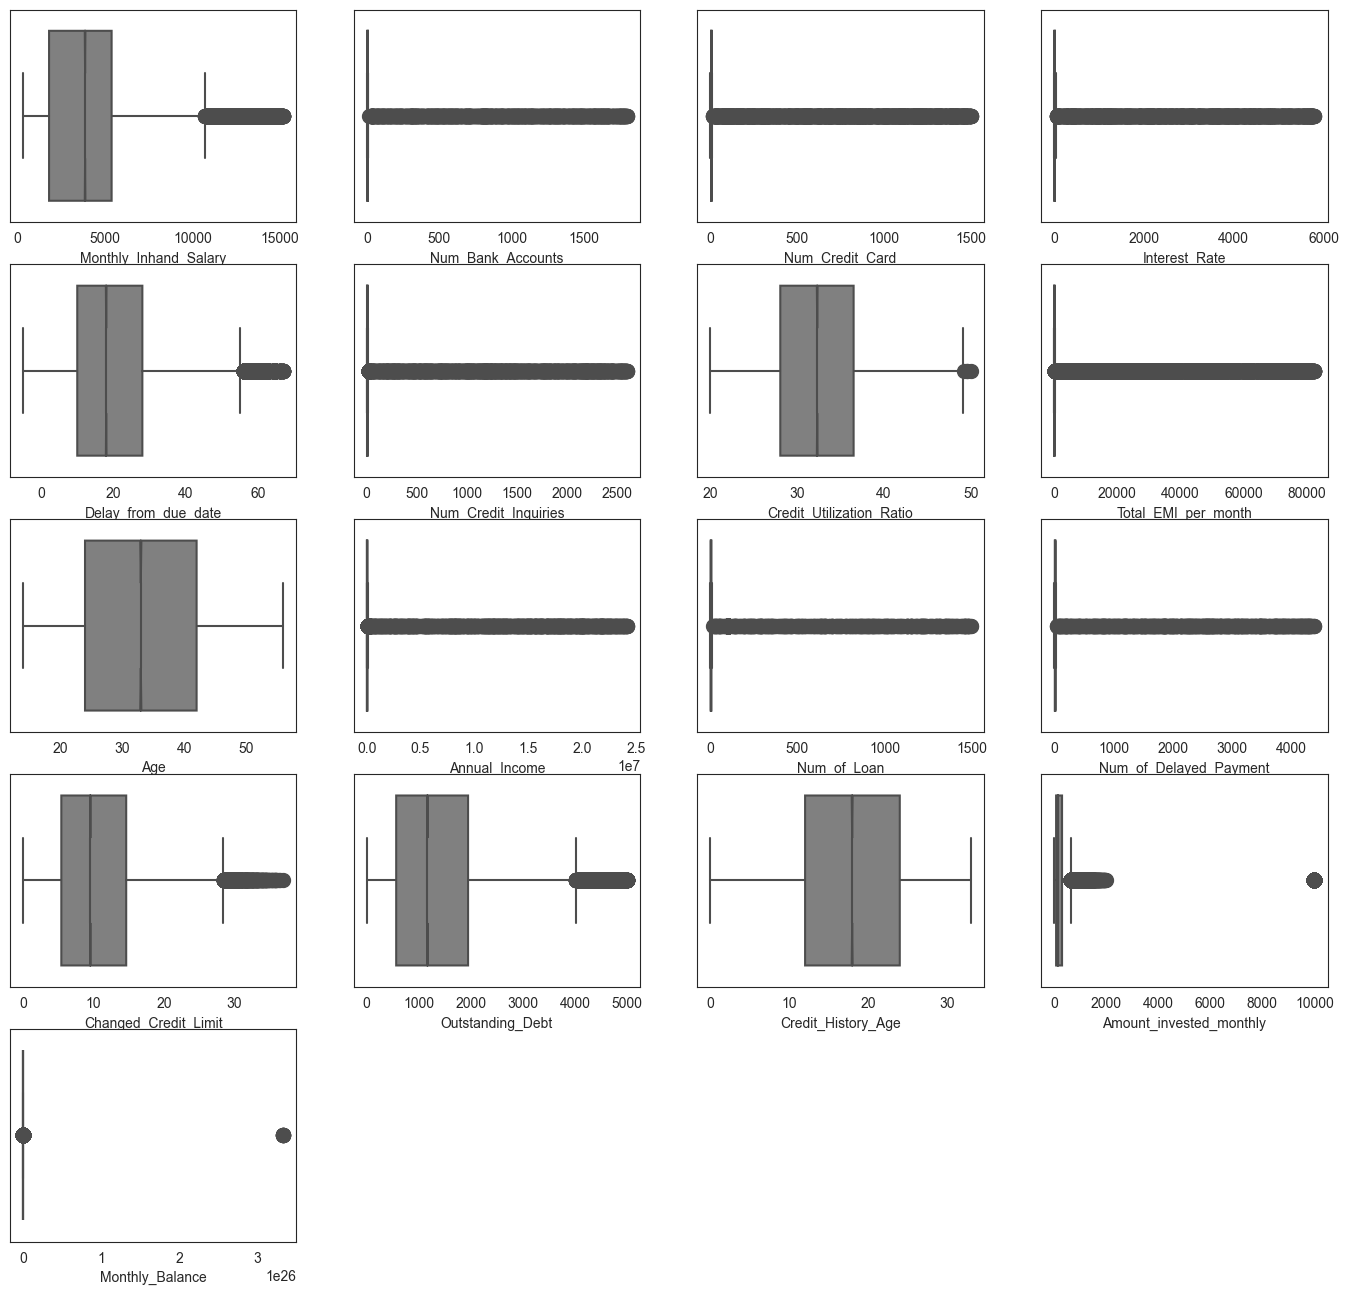

In [285]:
# checking outlier
plt.figure(figsize=(17,16))
for i,v in enumerate(numeric_col):
    plt.subplot(5,4,i+1)
    sns.boxplot(x=v, data=numeric_col,
                color='grey',
                notch=True,
                fliersize=10,
                flierprops={"marker": "o"})
plt.show()

In [286]:
def detect_outliers(numeric_col, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        Q1 = np.percentile(numeric_col[feature], 25)
        Q3 = np.percentile(numeric_col[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = numeric_col[(numeric_col[feature] < Q1 - outlier_step) | (numeric_col[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

numerical_columns = list(numeric_col)
print('Numerical columns: {}'.format(numerical_columns))
outliers_to_drop = detect_outliers(numeric_col, 2, numeric_col)
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

Numerical columns: ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance']
We will drop these 3318 indices:  [21, 23, 344, 345, 346, 348, 349, 351, 564, 617, 618, 619, 622, 721, 722, 723, 724, 725, 726, 727, 776, 777, 778, 779, 781, 782, 809, 810, 925, 1016, 1019, 1031, 1442, 1640, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 2226, 2229, 2352, 2353, 2354, 2356, 2357, 2358, 2359, 2382, 2383, 2544, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2592, 2698, 2789, 2928, 2929, 2930, 2931, 2932, 2933, 2934, 2935, 2986, 2987, 2990, 3089, 3090, 3091, 3092, 3093, 3095, 3184, 3185, 3186, 3187, 3190, 3233, 3234, 3237, 3621, 3623, 3825, 3826, 3827, 3828, 3829, 3830, 3831, 4145, 4147, 4240, 4241, 4243, 4

In [287]:
# Drop outliers
print("Before: {} rows".format(len(numeric_col)))
clean_outlier = numeric_col.drop(outliers_to_drop, axis = 0)
print("After: {} rows".format(len(clean_outlier)))

Before: 97219 rows
After: 93901 rows


In [288]:
# feature scaling
scaler = StandardScaler()
scaler.fit(numeric_col)
df_scaled = scaler.transform(numeric_col)
col_value_new = numeric_col.columns
df_scaled_ok = pd.DataFrame(df_scaled, columns = col_value_new)
df_scaled_ok.head(10)

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0              -0.807736          -0.120050        -0.143176      -0.148937   
1              -0.000275          -0.120050        -0.143176      -0.148937   
2              -0.000275          -0.120050        -0.143176      -0.148937   
3              -0.807736          -0.120050        -0.143176      -0.148937   
4              -0.000275          -0.120050        -0.143176      -0.148937   
5              -0.807736          -0.120050        -0.143176      -0.148937   
6              -0.807736          -0.120050        -0.143176      -0.148937   
7              -0.394300          -0.128547        -0.143176      -0.142517   
8              -0.394300          -0.128547        -0.143176      -0.142517   
9              -0.394300          -0.128547        10.574616      -0.142517   

   Delay_from_due_date  Num_Credit_Inquiries  Credit_Utilization_Ratio  \
0            -1.216801             -0.124446                 -1.067299   
1            -1.486013             -0.124446                 -0.066416   
2            -1.082195             -0.124446                 -0.177224   
3            -1.014892             -0.124446                 -1.463029   
4            -0.880286             -0.124446                 -0.981396   
5            -1.216801             -0.124446                 -1.904575   
6            -1.216801             -0.124446                 -1.631763   
7            -1.216801             -0.134881                 -1.528158   
8            -0.947589             -0.134881                  1.224347   
9            -1.216801             -0.134881                  0.183689   

   Total_EMI_per_month       Age  Annual_Income  Num_of_Loan  \
0            -0.162684 -0.958262      -0.110095    -0.109389   
1            -0.162684 -0.958262      -0.110095    -0.109389   
2            -0.162684 -0.958262      -0.110095    -0.109389   
3            -0.162684 -0.958262      -0.110095    -0.109389   
4            -0.162684 -0.958262      -0.110095    -0.109389   
5            -0.162684 -0.958262      -0.110095    -0.109389   
6            -0.162684 -0.958262      -0.110095    -0.109389   
7            -0.166399 -0.493988      -0.099113    -0.158267   
8            -0.166399 -0.493988      -0.099113    -0.158267   
9            -0.166399 -0.493988      -0.099113    -0.158267   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Outstanding_Debt  \
0               -0.109784              0.121728         -0.533428   
1                0.000330              0.121728         -0.533428   
2               -0.123593             -0.635697         -0.533428   
3                0.000330              0.121728         -0.533428   
4               -0.123593             -0.181242         -0.533428   
5               -0.105181              0.121728         -0.533428   
6               -0.114387              0.121728         -0.533428   
7               -0.123593             -0.764460         -0.710806   
8               -0.137401             -0.461489         -0.710806   
9               -0.146607             -0.764460         -0.710806   

   Credit_History_Age  Amount_invested_monthly  Monthly_Balance  
0            0.507999                -0.278780        -0.009737  
1           -0.000373                -0.259795        -0.009737  
2            0.507999                -0.219094        -0.009737  
3            0.507999                -0.298332        -0.009737  
4            0.507999                -0.287798        -0.009737  
5            0.507999                -0.229680        -0.009737  
6           -0.000373                -0.306672        -0.009737  
7            1.012151                -0.266809        -0.009737  
8            1.012151                -0.298848        -0.009737  
9            1.012151                -0.289760        -0.009737

In [289]:
dataset = pd.concat([df_scaled_ok, categ_col], axis=1, join='inner')
display(dataset)

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0                  -0.807736          -0.120050        -0.143176   
1                  -0.000275          -0.120050        -0.143176   
2                  -0.000275          -0.120050        -0.143176   
3                  -0.807736          -0.120050        -0.143176   
4                  -0.000275          -0.120050        -0.143176   
...                      ...                ...              ...   
97214              -0.284757          -0.111553        -0.127654   
97215              -0.284757          -0.111553        -0.127654   
97216              -0.284757          -0.111553        -0.127654   
97217              -0.284757          -0.111553        -0.127654   
97218              -0.284757          -0.111553        -0.127654   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
0          -0.148937            -1.216801             -0.124446   
1          -0.148937            -1.486013             -0.124446   
2          -0.148937            -1.082195             -0.124446   
3          -0.148937            -1.014892             -0.124446   
4          -0.148937            -0.880286             -0.124446   
...              ...                  ...                   ...   
97214      -0.140377             0.129259             -0.129663   
97215      -0.140377            -0.207256             -0.129663   
97216      12.104712             0.398471             -0.129663   
97217      -0.140377            -0.072650             -0.129663   
97218      -0.140377            -0.207256             -0.129663   

       Credit_Utilization_Ratio  Total_EMI_per_month       Age  Annual_Income  \
0                     -1.067299            -0.162684 -0.958262      -0.110095   
1                     -0.066416            -0.162684 -0.958262      -0.110095   
2                     -0.177224            -0.162684 -0.958262      -0.110095   
3                     -1.463029            -0.162684 -0.958262      -0.110095   
4                     -0.981396            -0.162684 -0.958262      -0.110095   
...                         ...                  ...       ...            ...   
97214                  0.464790            -0.164432 -0.772553      -0.095776   
97215                  1.618027            -0.164432 -0.772553      -0.095776   
97216                  1.752829            -0.164432 -0.772553      -0.095776   
97217                  0.264438            -0.164432 -0.772553      -0.095776   
97218                  0.372737            -0.164432 -0.772553      -0.095776   

       ...  Occupation_Musician  Occupation_Scientist  Occupation_Teacher  \
0      ...                    0                     1                   0   
1      ...                    0                     1                   0   
2      ...                    0                     1                   0   
3      ...                    0                     1                   0   
4      ...                    0                     1                   0   
...    ...                  ...                   ...                 ...   
97214  ...                    0                     0                   0   
97215  ...                    0                     0                   0   
97216  ...                    1                     0                   0   
97217  ...                    1                     0                   0   
97218  ...                    1                     0                   0   

       Occupation_Writer  Payment_Behaviour_High_spent_Large_value_payments  \
0                      0                                                  0   
1                      0                                                  0   
2                      0                                                  0   
3                      0                                                  0   
4                      0                                                  0   
...          

In [290]:
dataset = dataset.reset_index(drop=True)

# Split data into separate training and test set

In [291]:
X = dataset.drop(columns=['Credit_Score'])
Y = dataset.filter(['Credit_Score'], axis =1)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state=10)

In [292]:
# the credit score variable looks imbalanced and should be finalized later
print('Good', round(df['Credit_Score'].value_counts()['Good']/len(df) * 100,2), '% of the dataset')
print('Standard', round(df['Credit_Score'].value_counts()['Standard']/len(df) * 100,2), '% of the dataset')
print('Poor', round(df['Credit_Score'].value_counts()['Poor']/len(df) * 100,2), '% of the dataset')

Good 17.83 % of the dataset
Standard 53.17 % of the dataset
Poor 29.0 % of the dataset


<AxesSubplot: xlabel='Credit_Score', ylabel='count'>

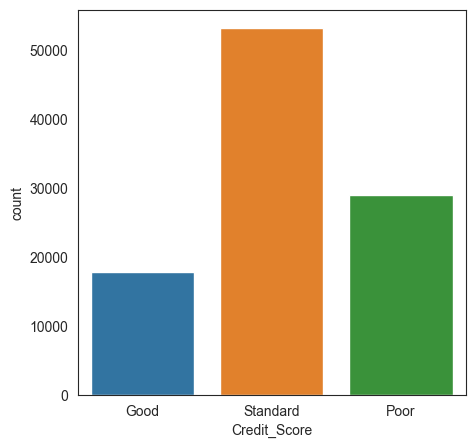

In [293]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='Credit_Score')

In [294]:
# SMOTE method
sm = SMOTE(random_state=27)
# applying it to the training set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

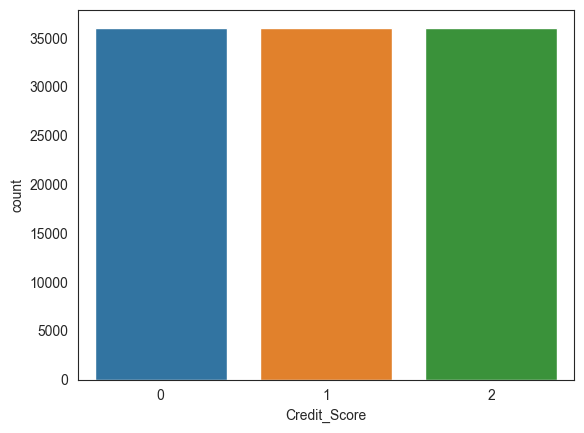

In [295]:
# Recheck imbalance
sns.countplot(x ='Credit_Score', data = y_train_smote)
plt.show()

# Modeling

In [296]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j],fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j]> thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Logistic Regresion
              precision    recall  f1-score   support

           0       0.34      0.39      0.36      5186
           1       0.56      0.44      0.49      8443
           2       0.62      0.66      0.64     15537

    accuracy                           0.55     29166
   macro avg       0.51      0.50      0.50     29166
weighted avg       0.56      0.55      0.55     29166

[[ 2035   281  2870]
 [ 1372  3724  3347]
 [ 2621  2601 10315]]


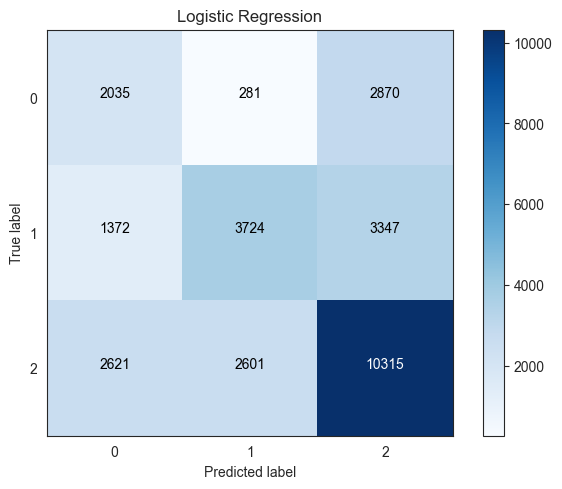

In [237]:
lr = LogisticRegression(max_iter=3000)
lr.fit(X_train_smote, y_train_smote.values.ravel())
test = lr.predict(X_test)

print ("Logistic Regresion")
print(classification_report(y_test, test))

sns.set_style('white') 
class_names = ['0','1','2']
plot_confusion_matrix(confusion_matrix(y_test,test),
                      classes= class_names, 
                      title='Logistic Regression')

Decision Tree
              precision    recall  f1-score   support

           0       0.56      0.58      0.57      5186
           1       0.52      0.55      0.54      8443
           2       0.66      0.63      0.65     15537

    accuracy                           0.60     29166
   macro avg       0.58      0.59      0.59     29166
weighted avg       0.60      0.60      0.60     29166

[[3030  450 1706]
 [ 474 4660 3309]
 [1911 3808 9818]]


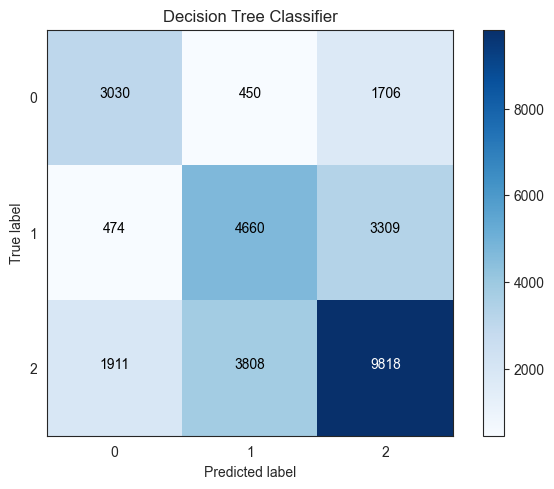

In [238]:
dt = DecisionTreeClassifier()
dt.fit(X_train_smote, y_train_smote.values.ravel())
test_dt = dt.predict(X_test)

print ("Decision Tree")
print(classification_report(y_test, test_dt))

sns.set_style('white') 
class_names = ['0','1','2']
plot_confusion_matrix(confusion_matrix(y_test,test_dt),
                      classes= class_names, 
                      title='Decision Tree Classifier')

Random Forest
              precision    recall  f1-score   support

           0       0.54      0.71      0.61      5186
           1       0.58      0.60      0.59      8443
           2       0.72      0.64      0.68     15537

    accuracy                           0.64     29166
   macro avg       0.61      0.65      0.63     29166
weighted avg       0.65      0.64      0.64     29166

[[3664  260 1262]
 [ 874 5045 2524]
 [2259 3388 9890]]


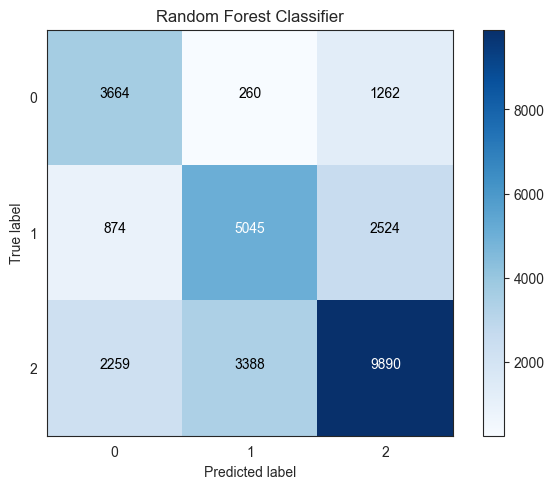

In [239]:
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train_smote, y_train_smote.values.ravel())
test_rf = rf.predict(X_test)

print ("Random Forest")
print(classification_report(y_test, test_rf))

sns.set_style('white') 
class_names = ['0','1','2']
plot_confusion_matrix(confusion_matrix(y_test,test_rf),
                      classes= class_names, 
                      title='Random Forest Classifier')

Naive Bayes
              precision    recall  f1-score   support

           0       0.47      0.73      0.57      5186
           1       0.51      0.40      0.45      8443
           2       0.66      0.62      0.64     15537

    accuracy                           0.57     29166
   macro avg       0.55      0.58      0.55     29166
weighted avg       0.58      0.57      0.57     29166

[[3802  281 1103]
 [1334 3360 3749]
 [3035 2916 9586]]


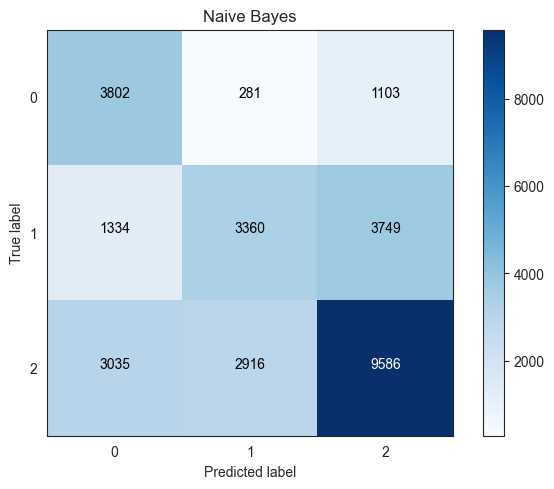

In [240]:
nb = GaussianNB()
nb.fit(X_train_smote, y_train_smote.values.ravel())
test_nb = nb.predict(X_test)

print ("Naive Bayes")
print(classification_report(y_test, test_nb))

sns.set_style('white') 
class_names = ['0','1','2']
plot_confusion_matrix(confusion_matrix(y_test,test_nb),
                      classes= class_names,
                      title='Naive Bayes')

Support Vector Machine
              precision    recall  f1-score   support

           0       0.47      0.78      0.59      5186
           1       0.59      0.48      0.53      8443
           2       0.71      0.62      0.67     15537

    accuracy                           0.61     29166
   macro avg       0.59      0.63      0.60     29166
weighted avg       0.63      0.61      0.61     29166

[[4065  146  975]
 [1418 4090 2935]
 [3089 2743 9705]]


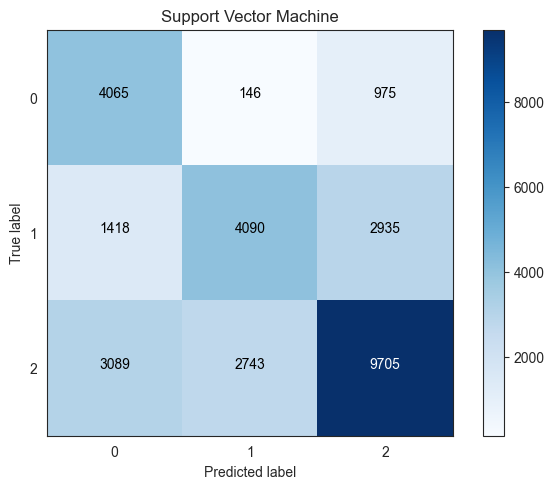

In [297]:
svm = SVC()
svm.fit(X_train_smote, y_train_smote.values.ravel())
test_svm = svm.predict(X_test)

print ("Support Vector Machine")
print(classification_report(y_test, test_svm))

sns.set_style('white') 
class_names = ['0','1','2']
plot_confusion_matrix(confusion_matrix(y_test,test_svm),
                      classes= class_names, 
                      title='Support Vector Machine')